# Case Study 1 : Data Mining in Financial Data

**Financial Data Collection:** 
* Please collect five-year stock price data of at least 5 stocks. You can choose any stocks you'd like to analyze.
* You have multiple ways of collecting financial data with Python, here is a reference: https://www.alpharithms.com/python-financial-data-491110/
* Load the data you collect and start working on your idea.


# Problem: pick a data science problem that you plan to solve using Stock Price Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data available and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

In [ ]:
# The problem I want to solve is:

I aim to predict future stock prices for selected companies using machine learning models. This problem is important for making informed investment decisions.
                                                                                                            

                                                                                                                    
                                                                  
# Here are the reasons why this question is important and interesting:
                                                                                                                    
Importance:
-Stock price forecasts are critical for investors, financial analysts, and institutions to make informed decisions about buying, holding, or selling assets. 
 Accurate forecasts can lead to huge financial gains or prevent losses.
     
-Understanding stock price trends helps assess market sentiment, economic stability, and overall corporate performance. 
     
-In the broader context, forecasting stock prices is an important tool for risk management, especially for portfolio managers who aim to hedge against market volatility.


Interesting aspects:
-Stock price data is highly dynamic and affected by many factors, including company performance, market conditions and geopolitical events.
 This makes the problem complex and challenging. 
                                                                                          
-It combines multiple disciplines, including statistics, machine learning and financial analysis, to provide a rich foundation for exploring innovative solutions. 
                                                                                                                   
-Solving this problem can reveal patterns and insights hidden in large data sets, providing a sense of accomplishment when predictions closely align with real-world outcomes. 
 
This mix of practical implications and analytical challenges makes stock price prediction an urgent problem that needs to be solved.



# Data Collection/Processing: 

In [19]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


# Data Collection

import yfinance as yf

# Define the stocks and the time period
stocks = ["GOOGL", "AAPL", "AMZN", "MSFT", "TSLA"]
start_date = "2018-08-08"
end_date = "2023-08-08"

# download the data
data = yf.download(stocks, start=start_date, end=end_date)
data.to_csv("stocks_data.csv")  # Save the data for future use



[*********************100%***********************]  5 of 5 completed


Price   Ticker
Close   AAPL      0
        AMZN      0
        GOOGL     0
        MSFT      0
        TSLA      0
High    AAPL      0
        AMZN      0
        GOOGL     0
        MSFT      0
        TSLA      0
Low     AAPL      0
        AMZN      0
        GOOGL     0
        MSFT      0
        TSLA      0
Open    AAPL      0
        AMZN      0
        GOOGL     0
        MSFT      0
        TSLA      0
Volume  AAPL      0
        AMZN      0
        GOOGL     0
        MSFT      0
        TSLA      0
dtype: int64
0


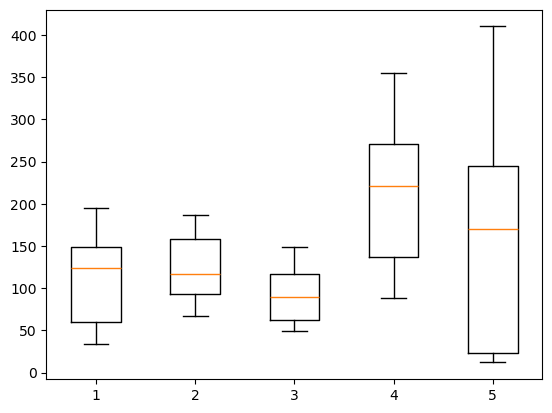

In [21]:

# Data Processing

# Check if exist missing values
print(data.isnull().sum())
 
# Check exduplicates
print(data.duplicated().sum())


import pandas as pd
# Convert the 'Date' column to datetime format
data.index = pd.to_datetime(data.index)


# Aggregate data
daily_data = data["Close"]  # Use Close prices
weekly_data = daily_data.resample('W').mean()  # Weekly
monthly_data = daily_data.resample('ME').mean()  # Monthly


# Check for outliers using boxplots
import matplotlib.pyplot as plt

plt.boxplot(daily_data)
plt.show()


# Data Exploration: Exploring the Dataset

**Plot the daily, weekly and monthly returns of a set of stocks of your choice** 
* references:
    * https://www.investopedia.com/terms/y/yearly-rate-of-return-method.asp
    * https://www.fool.com/knowledge-center/how-to-calculate-a-monthly-return-on-investment/#:~:text=Take%20the%20ending%20balance%2C%20and,corresponds%20to%20your%20monthly%20return.
    * https://www.investopedia.com/terms/i/intraday-return.asp#:~:text=How%20Is%20Daily%20Return%20Calculated,price%2C%20then%20multiply%20by%20100. 


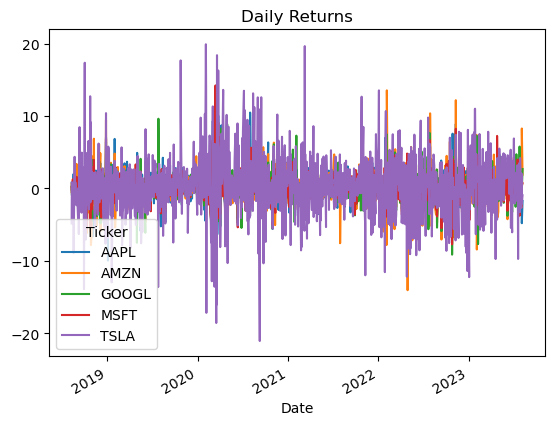

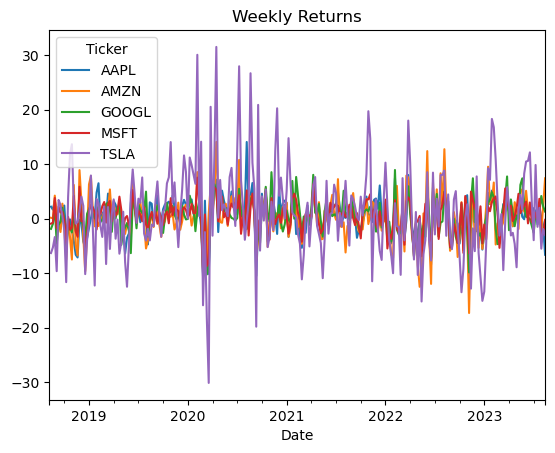

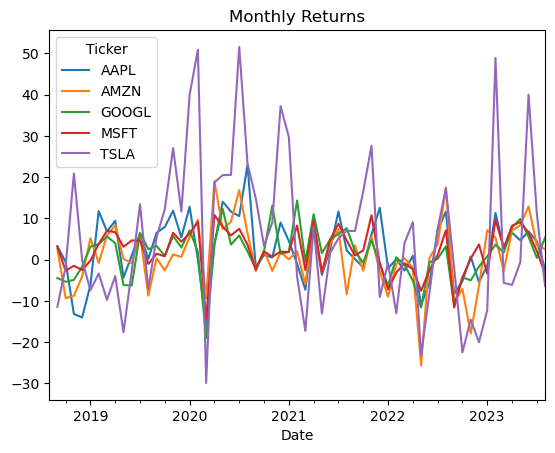

In [23]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


# Calculate returns
daily_returns = daily_data.pct_change() * 100
weekly_returns = weekly_data.pct_change() * 100
monthly_returns = monthly_data.pct_change() * 100

# Plot
daily_returns.plot(title="Daily Returns")
weekly_returns.plot(title="Weekly Returns")
monthly_returns.plot(title="Monthly Returns")
plt.show()



**Other data explorations you would like to present:**

In [25]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


# Explore Correlations: Analyze how stocks are correlated:
correlation_matrix = daily_returns.corr()
print(correlation_matrix)



Ticker      AAPL      AMZN     GOOGL      MSFT      TSLA
Ticker                                                  
AAPL    1.000000  0.639696  0.688011  0.762704  0.474238
AMZN    0.639696  1.000000  0.678046  0.704739  0.424390
GOOGL   0.688011  0.678046  1.000000  0.781280  0.404605
MSFT    0.762704  0.704739  0.781280  1.000000  0.452291
TSLA    0.474238  0.424390  0.404605  0.452291  1.000000


# The Solution: implement a data science solution to the problem you are trying to solve.

**Briefly describe the idea of your solutions to the problem in the following cell (you should use at least 2 methods/models to solve the problem, and compare the performance. Feel free to use any machine learning models or statistical models.):**

In [ ]:

--Solution: Implement a data science solution to predict future stock prices

-To predict stock prices, I will implement two machine learning models and compare their performance:

    1. Linear Regression: A simple and interpretable model suitable for understanding trends and relationships in stock price data.
    
    2. Random Forest: An ensemble model that captures non-linear relationships and interactions between features, often yielding better predictive performance on complex datasets.

My Steps:
    1. Preprocess and explore the data.
    2. Engineer features (e.g., moving averages, volatility).
    3. Train and evaluate the models using RMSE as the performance metric.
    4. Model Tuning and Optimization
    5. Compare the results and visualize the predictions.
    6. test models


**Write codes to implement the solution in python:**

In [27]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


# step 1: Data Loading and Exploration
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the stocks_data
data = pd.read_csv('stocks_data.csv', index_col=0)
data = data.sort_index()

# Display basic information
print(data.head())
print(data.info())





# 2: Feature Engineering

import pandas as pd

# Reload the data, skipping the first two rows
data = pd.read_csv("stocks_data.csv", skiprows=2)

# List of companies and price types
companies = ["AAPL", "AMZN", "GOOGL", "MSFT", "TSLA"]
price_types = ["Close", "High", "Low", "Open", "Volume"]

# Generate correct column names（Close_AAPL, High_AMZN,... Close_AMZN,  High_AAPL, ...）
new_columns = []
for price in price_types:
    for company in companies:
        new_columns.append(f"{price}_{company}")

# Check the original column count
print("Original column count:", len(data.columns))

# Add "Date" column to align with the data structure
if len(data.columns) != len(new_columns):
    print("Mismatch detected! Adding additional column for alignment.")
    new_columns.insert(0, "Date")  # Add the "Date" column name at the beginning

# Set new column names
data.columns = new_columns

# Convert the "Date" column to datetime format
data["Date"] = pd.to_datetime(data["Date"])

# Recheck that the column names are correct
print(data.head())
print(data.columns)

# Save modified data to new file
data.to_csv("stocks_data_modified.csv", index=False)



# Calculate rolling statistics (7-day and 30-day moving averages, and volatility) for 5 companies
# list of companies (adjusted for flat column names)
companies = ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'TSLA']

# Calculate rolling statistics for each company
for company in companies:
    data[f'{company}_MA7'] = data[f'Close_{company}'].rolling(window=7).mean()
    data[f'{company}_MA30'] = data[f'Close_{company}'].rolling(window=30).mean()
    data[f'{company}_Volatility'] = data[f'Close_{company}'].rolling(window=7).std()

# drop rows with NaN values generated from rolling computations
data.dropna(inplace=True)

# Check the resulting DataFrame
print(data.head())






# 3: Split into training and testing sets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# list of features (MA7, MA30, Volatility for all companies)
features = [
    'AAPL_MA7', 'AAPL_MA30', 'AAPL_Volatility',
    'AMZN_MA7', 'AMZN_MA30', 'AMZN_Volatility',
    'GOOGL_MA7', 'GOOGL_MA30', 'GOOGL_Volatility',
    'MSFT_MA7', 'MSFT_MA30', 'MSFT_Volatility',
    'TSLA_MA7', 'TSLA_MA30', 'TSLA_Volatility'
]

# Target variable (close prices of all companies)
X = data[features]
y = data[['Close_AAPL', 'Close_AMZN', 'Close_GOOGL', 'Close_MSFT', 'Close_TSLA']]

# split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features (X) using StandardScaler, keeping target values (y) unchanged
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training and testing sets prepared. X_train_scaled shape: {X_train_scaled.shape}, X_test_scaled shape: {X_test_scaled.shape}")



                         Close            Close.1             Close.2  \
Price                                                                   
2018-08-08   49.14332962036133  94.32599639892578   62.83870315551758   
2018-08-09   49.52984619140625   94.9260025024414   62.99463653564453   
2018-08-10    49.3823127746582  94.31500244140625  62.399295806884766   
2018-08-13  49.701175689697266  94.80999755859375   62.20649719238281   
2018-08-14   49.91056823730469  95.98249816894531   62.67978286743164   

                       Close.3             Close.4               High  \
Price                                                                   
2018-08-08  102.36183166503906  24.689332962036133  49.27611680785744   
2018-08-09  102.53009796142578  23.496667861938477   49.7432536896064   
2018-08-10  101.90375518798828   23.69933319091797  49.75590017502978   
2018-08-13  101.16516876220703   23.76066780090332  50.19611770557724   
2018-08-14  102.42728424072266  23.176000595092773

# Results: summarize and visualize the results discovered from the analysis

**Summarize the results of different models. Compare the perfomance and explain it. Please use figures or tables to present the results.**


   Stock  Linear Regression RMSE  Random Forest RMSE
0   AAPL                2.839589            2.266380
1   AMZN                3.482612            2.667488
2  GOOGL                2.155134            1.678105
3   MSFT                5.204354            4.021196
4   TSLA                8.104186            6.646395
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Retrained Model: RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)


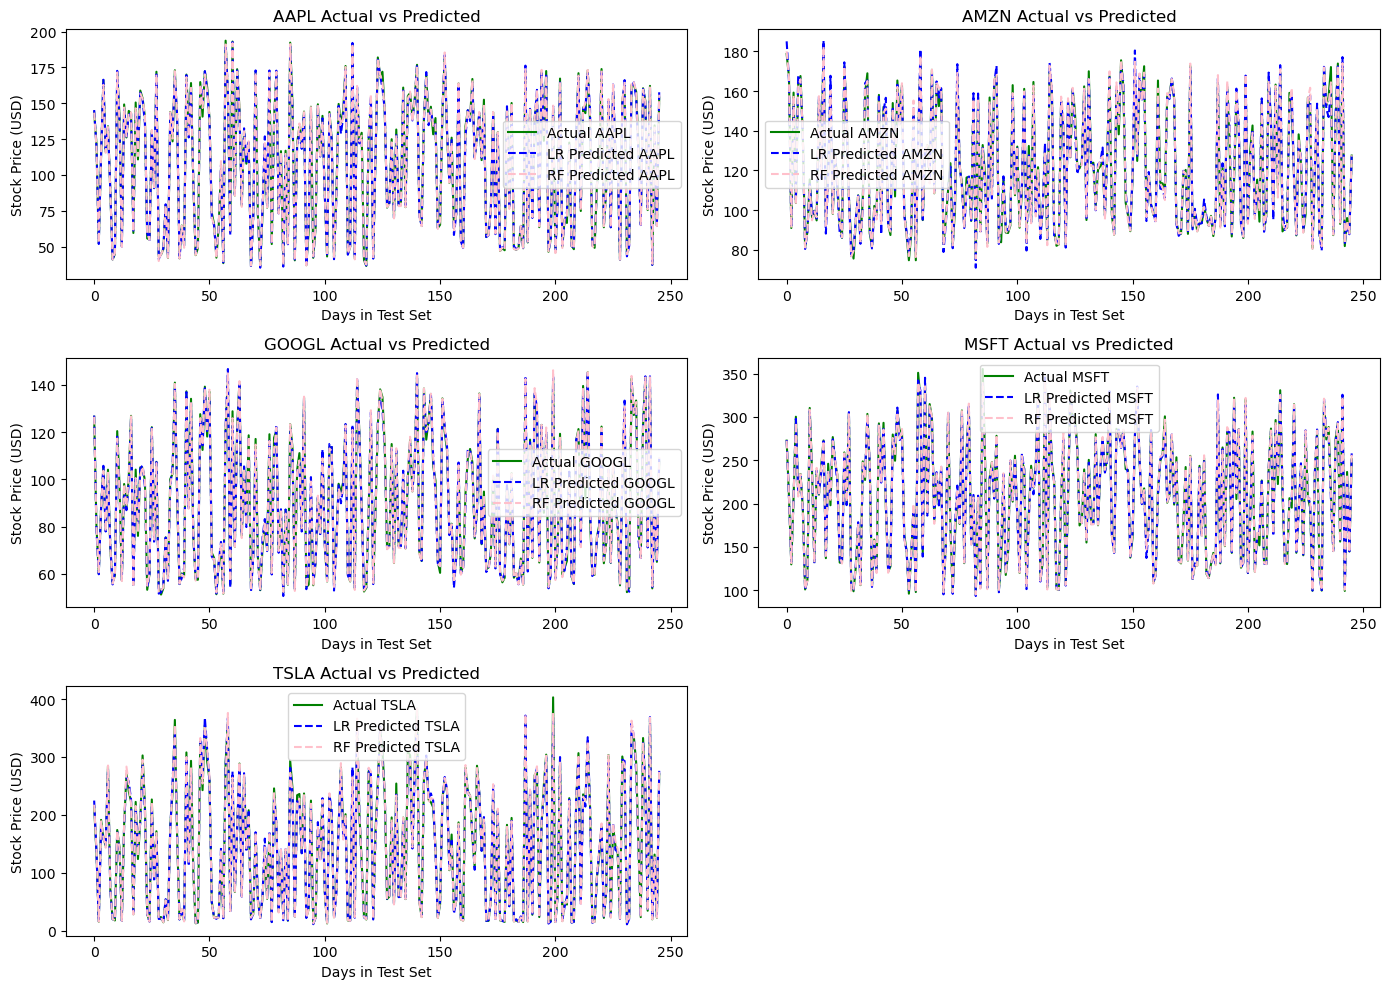

   Stock  Linear Regression Prediction  Random Forest Prediction
0   AAPL                    130.069034                161.244692
1   AMZN                   3251.357678                172.776360
2  GOOGL                   2776.416475                145.081730
3   MSFT                    389.788485                321.677732
4   TSLA                   1606.153184                349.379785


In [33]:
# Your code starts here
#   Please add comments or text cells in betweebn to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary



# step 4: Model Training

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Train a Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)

# Train a Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)




# 5: Model Evaluation

# Calculate RMSE for each stock separately
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions, multioutput='raw_values'))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions, multioutput='raw_values'))

# Print RMSE for each stock
companies = ["AAPL", "AMZN", "GOOGL", "MSFT", "TSLA"]

rmse_df = pd.DataFrame({
    "Stock": companies,
    "Linear Regression RMSE": lr_rmse,
    "Random Forest RMSE": rf_rmse
})
print(rmse_df)





# 6. Random Forest Regressor model Tuning and Optimization

from sklearn.model_selection import GridSearchCV

# Initialize Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, None],     # Tree depth
    'min_samples_split': [2, 5, 10]  # Minimum samples per split
}

# initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit GridSearchCV on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_



# 7. Retrain with best Parameters(Random Forest Regressor model):
best_model.fit(X_train_scaled, y_train)
print("Retrained Model:", best_model)


# Step 8: Visualization
plt.figure(figsize=(14, 10))

# Plot actual vs predicted for each company
for i, company in enumerate(companies):
    plt.subplot(3, 2, i+1)
    plt.plot(y_test.iloc[:, i].values, label=f'Actual {company}', color='green')
    plt.plot(lr_predictions[:, i], label=f'LR Predicted {company}', color='blue', linestyle='dashed')
    plt.plot(rf_predictions[:, i], label=f'RF Predicted {company}', color='pink', linestyle='dashed')
    plt.legend()
    plt.title(f"{company} Actual vs Predicted")
    
    # Add x-axis and y-axis labels
    plt.xlabel("Days in Test Set")
    plt.ylabel("Stock Price (USD)")

plt.tight_layout()
plt.show()



# Step9. Use some new data to test models:
new_data = {
    'AAPL_MA7': 152, 'AAPL_MA30': 143, 'AAPL_Volatility': 2.4,
    'AMZN_MA7': 3298, 'AMZN_MA30': 3251, 'AMZN_Volatility': 16,
    'GOOGL_MA7': 2789, 'GOOGL_MA30': 2753, 'GOOGL_Volatility': 11,
    'MSFT_MA7': 287, 'MSFT_MA30': 279, 'MSFT_Volatility': 3.1,
    'TSLA_MA7': 909, 'TSLA_MA30': 888, 'TSLA_Volatility': 41
}

# convert to DataFrame and scale
new_data_df = pd.DataFrame([new_data])
new_data_scaled = scaler.transform(new_data_df)

# Predict using the best model
rf_future_prediction = best_model.predict(new_data_scaled)

lr_future_prediction = lr_model.predict(new_data_scaled)

# output predictions
future_predictions_df = pd.DataFrame({
    "Stock": companies,
    "Linear Regression Prediction": lr_future_prediction[0],
    "Random Forest Prediction": rf_future_prediction[0]
})
print(future_predictions_df)



In [37]:

# Compare the perfomance and explain it：

"""
- Random Forest Regressor consistently outperforms Linear Regression, achieving lower RMSE for all five stocks.
- reasons:
    - Stock prices highly volatile, showing a non-linear relationship. 
    — Linear regression assumes a linear relationship between features and stock prices, which is too simple for complex financial data. 
    - Random forests can capture nonlinear patterns by using multiple decision trees, making them more suitable for stock price predictions.
    
- Key Observations:
    - GOOGL has the lowest Root Mean Square Errors, which means it is the easiest to predict. 
    - TSLA has the highest RMSE, indicating that it is the most difficult stock to predict, probably due to its high volatility. 
    - MSFT also shows higher RMSE, indicating higher market volatility.

So: 
Random forest is a better stock price prediction model because of its ability to capture nonlinear patterns. 
Linear regression is too simple for stock price prediction. 
Stock volatility affects forecast accuracy - stocks like Tesla are difficult to predict due to their high volatility.

"""



'\n- Random Forest Regressor consistently outperforms Linear Regression, achieving lower RMSE for all five stocks.\n- reasons:\n    - Stock prices highly volatile, showing a non-linear relationship. \n    — Linear regression assumes a linear relationship between features and stock prices, which is too simple for complex financial data. \n    - Random forests can capture nonlinear patterns by using multiple decision trees, making them more suitable for stock price predictions.\n    \n- Key Observations:\n    - GOOGL has the lowest Root Mean Square Errors, which means it is the easiest to predict. \n    - TSLA has the highest RMSE, indicating that it is the most difficult stock to predict, probably due to its high volatility. \n    - MSFT also shows higher RMSE, indicating higher market volatility.\n\nSo: \nRandom forest is a better stock price prediction model because of its ability to capture nonlinear patterns. \nLinear regression is too simple for stock price prediction. \nStock vola